<a href="https://colab.research.google.com/github/SaxenaKushagr/Vehicle-Insurance-Analysis/blob/main/EDA_Vehicle_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = ('/content/drive/MyDrive/008 - My Projects/Vehicle Insurance/Vehicle_Insurance.csv')
df = pd.read_csv(file)

In [ ]:
'''Beginning by exploring the dataset'''
'''Understanding the structure of data, the Dtypes of variables available, and the general patterns'''

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Check the number of unique values in each column

print("\nUnique Values per Column:\n", df.nunique())


Unique Values per Column:
 id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64


In [ ]:
'''Descriptive Statistics about our dataset'''

df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#As soon as we perform Exploratory and Descriptive analysis, we can now begin Data Cleaning.

In [ ]:
'''Let's drop any duplicate entries and check the shape of our dataset'''

df.drop_duplicates()
print(f"Dataset Shape:", df.shape)

Dataset Shape: (381109, 12)


In [ ]:
'''Let's find Null/Missing values in our dataset(Column-wise)'''

df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
'''Total Number of Null values in our dataset'''

df.isnull().sum().sum()

0

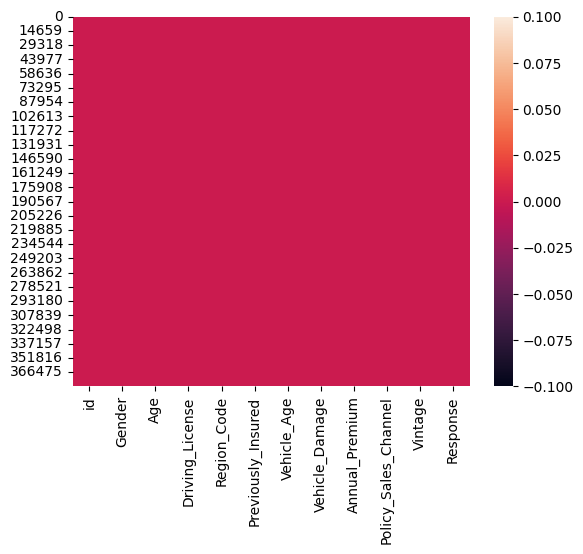

In [ ]:
'''Heatmap of Null values'''

sns.heatmap(df.isnull())
plt.show()

In [ ]:
# We see that there are no null values present in our dataset and all features seems cleaned.

# But we need to check "Annual_Premium" for outliers.

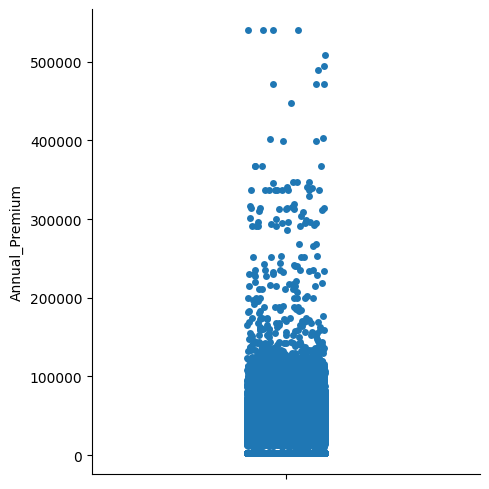

In [ ]:
'''Feature - Annual_Premium'''

# Drawing a catplot of feature 'Annual_Premium' for checking if there's any outliers exist

sns.catplot(df['Annual_Premium'])
plt.show()

In [ ]:
'''Outliers handling in feature 'Annual_Premium' by IQR Method.'''

In [ ]:
# Calculating IQR for 'market_price'.

Q1 = df['Annual_Premium'].quantile(0.25)
print(f"Q1 is {Q1}")

Q3 = df['Annual_Premium'].quantile(0.75)
print(f"Q3 is {Q3}")

Q1 is 24405.0
Q3 is 39400.0


In [ ]:
IQR = Q3 - Q1
print(f"IQR is {IQR}")

IQR is 14995.0


In [ ]:
# Defining the outlier boundaries.

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

1912.5
61892.5


In [ ]:
# Identifying outliers.

# Our feature 'Annual_Premium' lies between 1,912.5 and 61,892.5 as per IQR Method,
# therefore any value below 1,912.5 and beyond 61,892.5 is considered as an outlier.

outliers = df[(df['Annual_Premium'] < lower_bound) | (df['Annual_Premium'] > upper_bound)]
outliers

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [ ]:
# Checking Median.

median = df['Annual_Premium'].median()
median

31669.0

In [ ]:
# Replacing Outliers in 'Annual_Premium' with Median

df['Annual_Premium'] = np.where((df['Annual_Premium'] < lower_bound) | (df['Annual_Premium'] > upper_bound), median, df['Annual_Premium'])

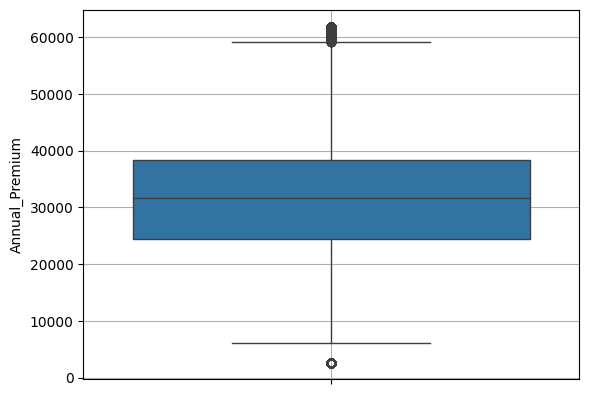

In [ ]:
# We see that there are still a few outliers exists.

sns.boxplot(df['Annual_Premium'])
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

df['Annual_Premium'] = winsorize(df['Annual_Premium'], limits=[0.05, 0.05])

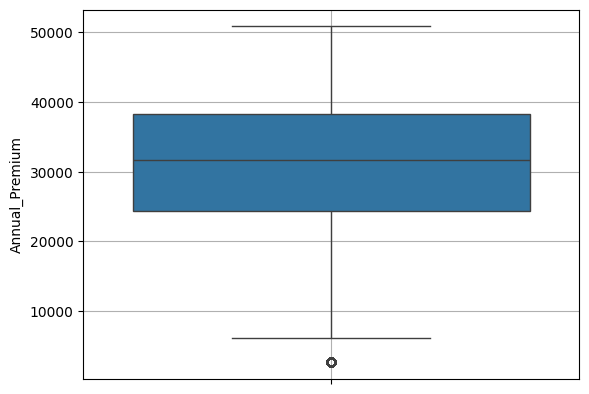

In [ ]:
# Let's check the boxplot again

sns.boxplot(df['Annual_Premium'])
plt.grid(True)
plt.show()

In [ ]:
# Checking values equals to 2630 in Annual_Premium

df[df['Annual_Premium'] == 2630]


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
15,16,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1
30,31,Female,26,1,8.0,0,< 1 Year,No,2630.0,160.0,136,0
43,44,Female,38,1,35.0,1,1-2 Year,No,2630.0,152.0,153,0
58,59,Female,62,1,48.0,0,1-2 Year,Yes,2630.0,15.0,295,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381070,381071,Female,28,1,11.0,0,< 1 Year,Yes,2630.0,124.0,106,0
381086,381087,Female,34,1,35.0,0,1-2 Year,Yes,2630.0,152.0,208,0
381092,381093,Male,38,1,28.0,1,1-2 Year,No,2630.0,124.0,130,0
381094,381095,Female,47,1,20.0,0,1-2 Year,Yes,2630.0,26.0,84,0


In [ ]:
# Since 64,877 values of 'Annual_Premium' are same, which is 2630.0, it will not be appropriate to replace or remove them.

# As it will impact accuracy of the dataset, therefore considering it as cleaned and proceeding further for EDA

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,29109.781459,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,14165.309425,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,38346.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,50871.000000,163.000000,299.000000,1.000000


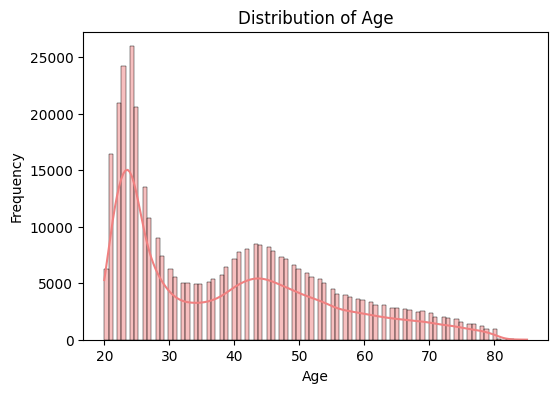

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the Distribution of Age'''

plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, color='lightcoral')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# From the distribution plot of 'Age', we can observe that:

# 1. The age of policyholders is mostly distributed between 20 and 60 years old.
# 2. It shows a right-skewed distribution, indicating a higher concentration of younger individuals compared to older individuals.
# 3. There's a peak around the age of 25-30, suggesting a significant portion of the policyholders belong to that age group.

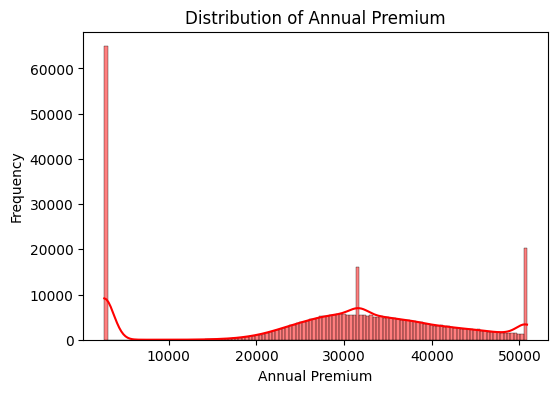

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the Distribution of Annual premium'''

plt.figure(figsize=(6, 4))
sns.histplot(df['Annual_Premium'], kde=True, color = 'red')
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# From the distribution plot of 'Annual_Premium', we can observe that:

# 1. The majority of policyholders have an annual premium that falls within a specific range.
# 2. The distribution of annual premium seems to be right-skewed, indicating a potential concentration of individuals with lower premium amounts and fewer with higher premium amounts.
# 3. The presence of a peak suggests a common annual premium amount or a particular segment of individuals paying around that amount.


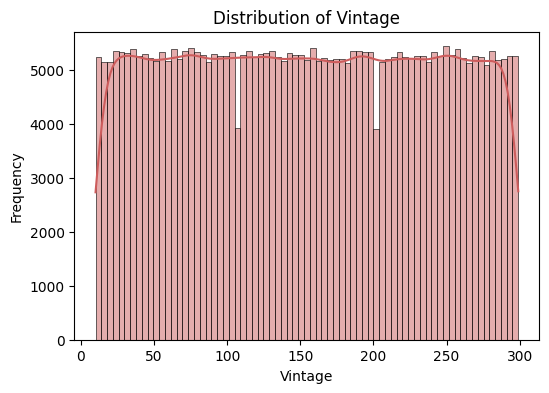

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the Distribution of Vintage'''

plt.figure(figsize=(6, 4))
sns.histplot(df['Vintage'], kde=True, color = 'indianred')
plt.title('Distribution of Vintage')
plt.xlabel('Vintage')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# From the distribution plot of 'Vintage', we can observe that:

# 1. The vintage of policyholders is mostly concentrated towards the lower range, indicating that a significant number of policyholders have been associated with the company for a relatively shorter duration.
# 2. It seems to be a right-skewed distribution with a longer tail towards the higher vintage values. This could imply that fewer customers have been with the company for a longer period of time compared to those with shorter tenure.
# 3. The presence of a peak at the lower end of the vintage range reinforces the observation that most policyholders are relatively new customers.


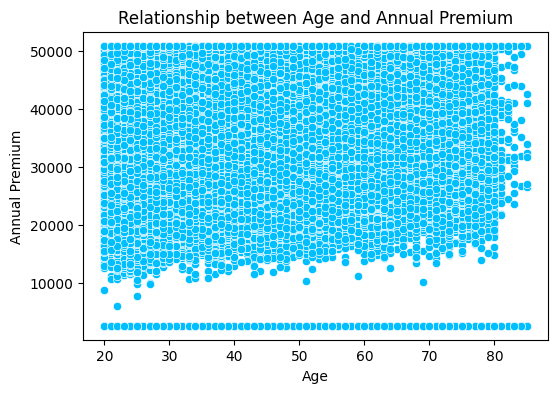

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the Distribution between Age and Annual Premium'''

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df, color = 'deepskyblue')
plt.title('Relationship between Age and Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# From the scatter plot of 'Age' and 'Annual_Premium', we can observe that:

# 1. There's no clear linear relationship between the age of policyholders and their annual premium amount.
# 2. We can see a large cluster of points within the lower range of annual premiums and various ages, suggesting that several policyholders have similar annual premiums irrespective of age.
# 3. Though there's no strict correlation, we can observe some policyholders with higher annual premiums tend to be older. This could indicate that age might be a contributing factor to higher premium amounts.
# 4. It's essential to consider other variables that influence premium amounts, such as vehicle type or driving history, for a more comprehensive understanding of the relationship between age and premium costs.


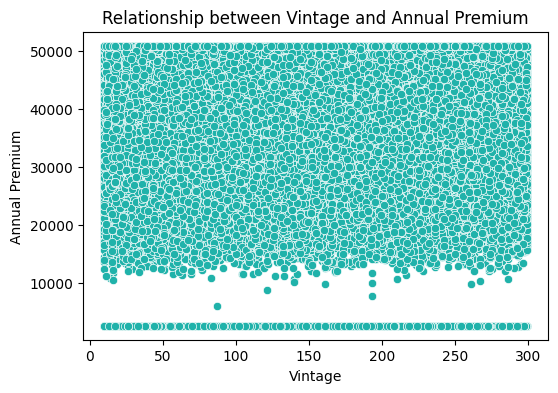

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the Distribution between Vintage and Annual Premium'''

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Vintage', y='Annual_Premium', data=df, color = 'lightseagreen')
plt.title('Relationship between Vintage and Annual Premium')
plt.xlabel('Vintage')
plt.ylabel('Annual Premium')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# 1. There is no clear linear relationship between the vintage of policyholders and their annual premium amount.
# 2. We can see a large cluster of points within the lower range of annual premiums and various vintage, suggesting that several policyholders have similar annual premiums irrespective of the time they have been with the company.
# 3. There doesn't seem to be a strong correlation between vintage and premium amount. This implies that the duration for which a customer has been with the company might not be a significant determinant of the premium they pay.
# 4. The scatterplot indicates that the relationship is not linear or monotonic. It's possible that other factors, such as the type of policy or vehicle characteristics, play a more significant role in determining the premium amount than simply how long a customer has been with the company.


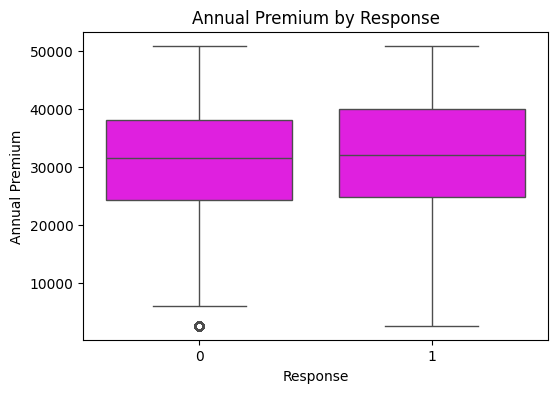

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the Distribution between Annual Premium and Response'''

plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Annual_Premium', data=df, color = 'fuchsia')
plt.title('Annual Premium by Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# 1. The distribution of annual premium seems to be relatively similar for both response categories (0 and 1).
# 2. There's a slight tendency for policyholders who responded positively (Response = 1) to have a slightly higher median annual premium compared to those who didn't respond positively (Response = 0).
# 3. The interquartile ranges (IQR) are also comparable for both response categories, suggesting that the variability in annual premiums is similar for both groups.
# 4. However, the presence of outliers in both categories might influence the comparison of median annual premiums between response categories.
# 5. It's crucial to investigate further and consider other factors alongside annual premium to understand the relationship between response and various variables.


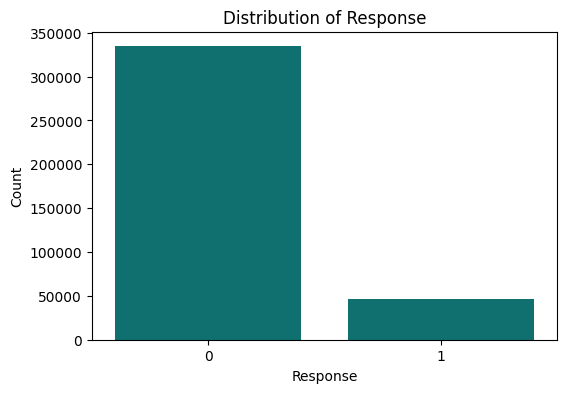

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the Distribution of Response'''

plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df, color = 'teal')
plt.title('Distribution of Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# From the countplot of 'Response', we can observe that:

# 1. The majority of policyholders did not respond positively to the campaign.
# 2. The number of policyholders who responded positively is significantly lower than those who did not respond.
# 3. This indicates that the campaign may have been less effective in converting potential customers.
# 4. Further analysis is needed to understand the reasons for the low response rate and to improve the effectiveness of future campaigns.


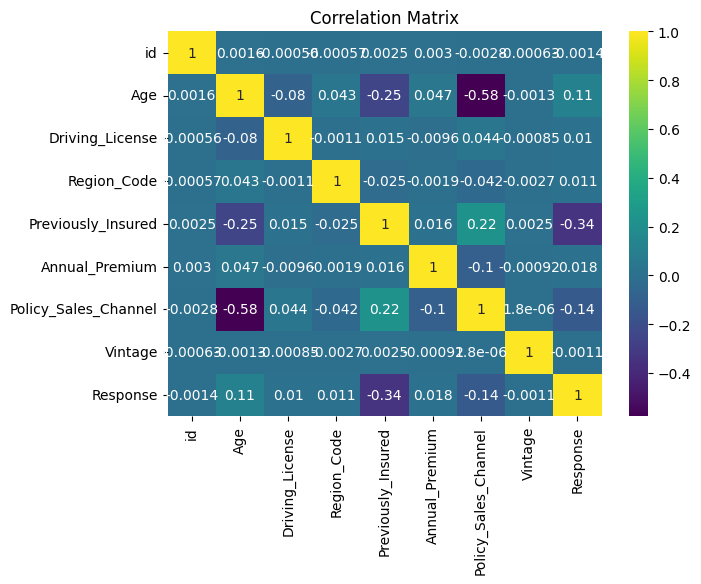

In [ ]:
''' Question 1 - Utilize various visualization techniques to explore the distribution of key variables.'''
'''Show the correlation between numeric variables'''

correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# From the correlation matrix, we can observe the following:

# 1. Age and Vintage show a weak positive correlation, suggesting that older policyholders might have a slightly longer tenure with the company.
# 2. There is no strong correlation between Age and Annual Premium. However, it might be worth exploring further with more detailed analysis.
# 3. Vintage and Annual Premium show no significant correlation.
# 4. The correlation between Response and other numerical variables is mostly weak. It suggests that other factors might be influencing the response rate more strongly than these numerical features.
# 5. Further analysis, such as examining the relationship between Response and categorical features, can provide more comprehensive insights.

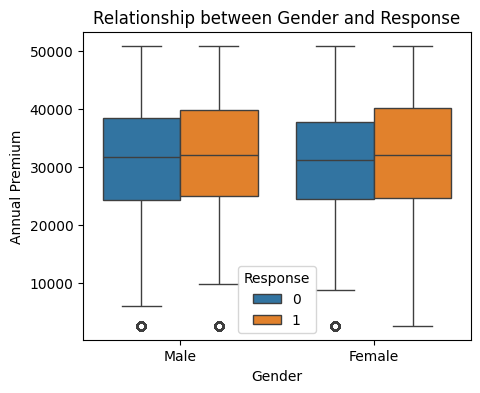

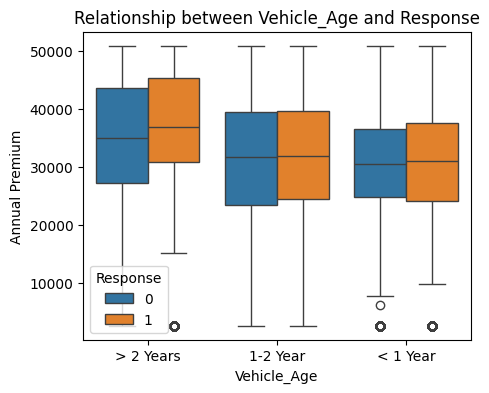

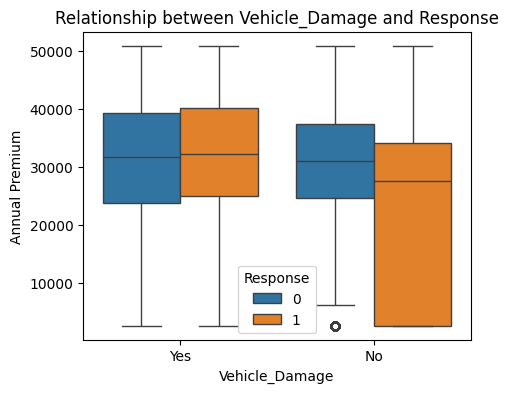

In [ ]:
'''Feature Analysis'''
'''Question 2 - Examine the relationship between features and the target variable (insurance claims).'''
'''Show the Distribution of categorical features vs. Response'''

# Box plots for categorical features vs. Response
for column in df.select_dtypes(include=['object']).columns:
  plt.figure(figsize=(5,4))
  sns.boxplot(x=column, y='Annual_Premium', hue='Response', data=df)
  plt.title(f'Relationship between {column} and Response')
  plt.xlabel(column)
  plt.ylabel('Annual Premium')
  plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# Meaningful insights from the box plots of categorical features vs. Response:

# 1. Vehicle Age:
#    - We can observe the distribution of 'Annual_Premium' for different vehicle age categories, grouped by 'Response'.
#    - If there's a difference in the median or distribution of premiums for specific vehicle age categories and their response,
#      it might suggest that vehicle age influences the likelihood of a customer responding to the campaign.
#    - For example, if older vehicles show a higher likelihood of positive responses,
#      it might indicate that customers with older vehicles are more likely to be targeted by the campaign.

# 2. Gender:
#    - Comparing 'Annual_Premium' distributions for male and female policyholders, grouped by 'Response'.
#    - If there's a difference in premium distributions between genders and their responses,
#      it could imply a gender-based pattern in campaign responses.
#    - For example, if female policyholders tend to have a higher rate of positive responses,
#      it might indicate that the campaign resonates more with female customers.

# 3. Vehicle Damage:
#    - Analyzing 'Annual_Premium' for policyholders with or without vehicle damage history, and their responses.
#    - If customers with a history of vehicle damage show a different pattern in responses,
#      it could indicate that previous claims or damage might influence their likelihood of responding positively.
#    - For example, customers with past damages might be more sensitive to offers related to vehicle protection or insurance coverage enhancements.

# In summary, these box plots allow us to visually inspect and analyze how different categorical features interact with 'Annual_Premium' and 'Response'.
# By identifying potential patterns or differences in distributions within these features, we can gain insights into factors that influence customer responses.
# Further analysis, like statistical tests or modeling, can help to validate these observations and understand their importance in predicting the likelihood of a positive campaign response.


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


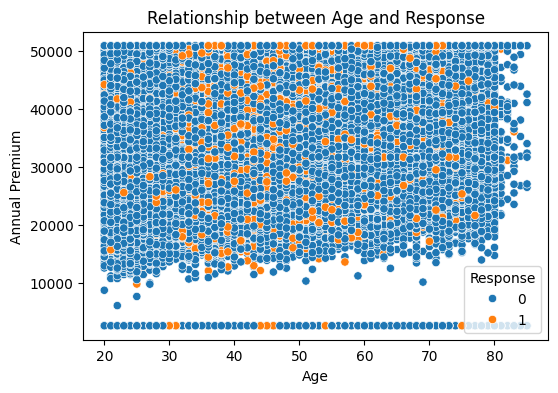

In [ ]:
'''Question 2 - Examine the relationship between features and the target variable (insurance claims).'''
'''Show the Distribution of numerical features vs. Response'''

# Scatter plots for numerical features vs. Response
for column in df.select_dtypes(include=['number']).columns:
  if column == 'Age':
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=column, y='Annual_Premium', hue='Response', data=df)
    plt.title(f'Relationship between {column} and Response')
    plt.xlabel(column)
    plt.ylabel('Annual Premium')
    plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# Age vs. Annual Premium and Response:
#    - The scatter plot visualizes the relationship between age, annual premium, and whether a customer responded positively to the campaign.
#    - By examining the distribution of points for different response categories, we can understand if there's a difference in the relationship between age and annual premium for customers who responded positively versus those who did not.
#    - For example, if we see a higher concentration of positive responses among a particular age group (e.g., younger individuals) with a certain range of annual premiums, it could suggest that the campaign is more effective for that specific segment of customers.
#    - We might also observe if older customers with higher premiums are more or less likely to respond positively.
#    - In essence, the plot allows us to identify potential patterns in customer responses based on their age and premium amount.

# In summary, the scatter plots help us analyze how numerical features interact with 'Response'.
# By identifying potential patterns or relationships between these features and the response variable, we can gain insights into factors that influence campaign responses.
# Further analysis, such as regression or correlation analysis, can help to validate these observations and understand their importance in predicting the likelihood of a positive campaign response.


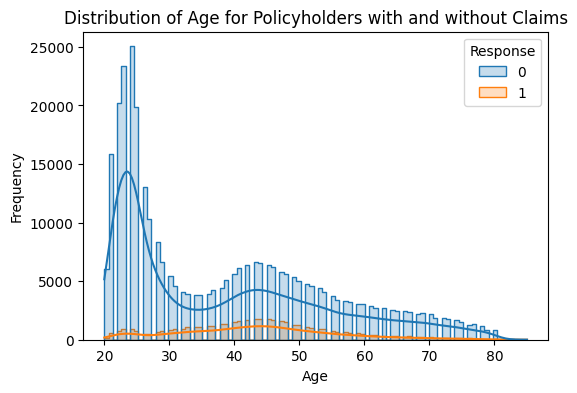

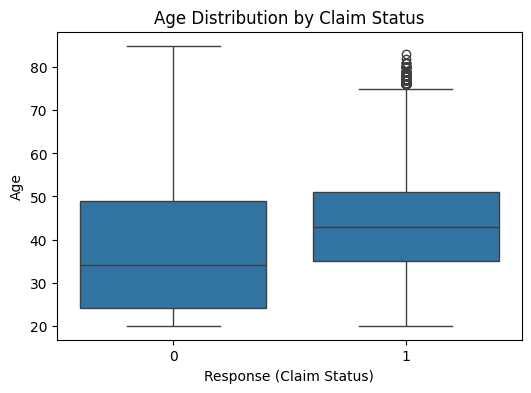

In [ ]:
'''Age Distribution'''
'''Question 3 - Analyze the age distribution within the dataset and its impact on insurance claims.'''

# Analyze the age distribution and its impact on insurance claims (assuming 'Response' represents claims)

# 1. Distribution of Age for Policyholders with and without Claims
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', hue='Response', kde=True, element="step")
plt.title('Distribution of Age for Policyholders with and without Claims')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot of Age vs. Response
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age Distribution by Claim Status')
plt.xlabel('Response (Claim Status)')
plt.ylabel('Age')
plt.show()

In [ ]:
# Calculate the mean age for policyholders with and without claims
mean_age_with_claims = df[df['Response'] == 1]['Age'].mean()
mean_age_without_claims = df[df['Response'] == 0]['Age'].mean()

print(f"Mean Age with Claims: {mean_age_with_claims:.2f}")
print(f"Mean Age without Claims: {mean_age_without_claims:.2f}")

Mean Age with Claims: 43.44
Mean Age without Claims: 38.18


In [ ]:
'''Meaningful insights from above plot'''

# - The histograms/box plots will show how age is distributed across policyholders with and without claims.
# - If there's a significant difference in the mean or median age between the two groups, it suggests a potential relationship between age and claim likelihood.
# - If certain age ranges show a higher proportion of claims, it indicates a specific age group is more prone to claiming insurance.
# - The analysis can help identify age-related risk factors and inform strategies for targeted risk assessment and pricing.

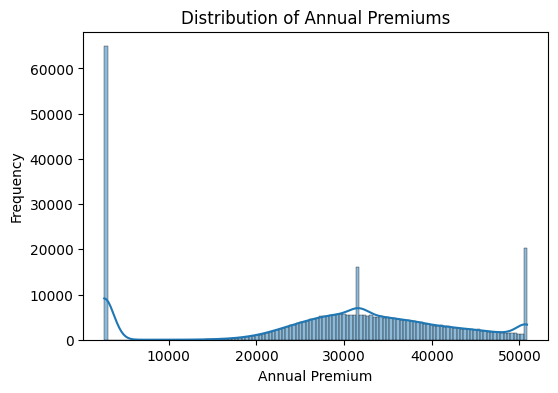

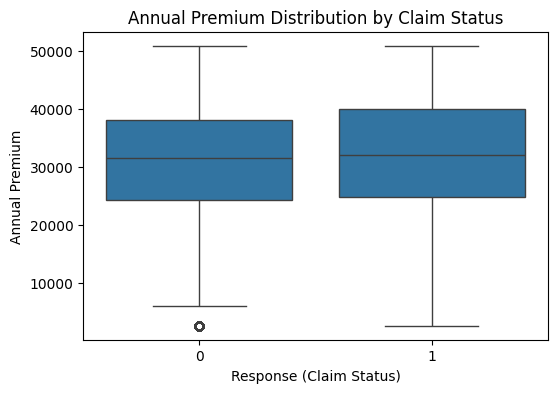

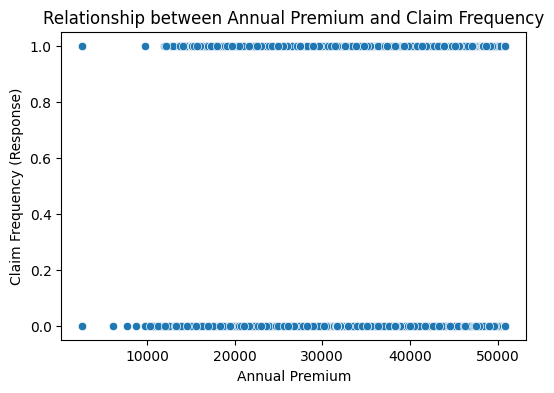

In [ ]:
'''Premium Analysis'''
'''Question 4 - Investigate the distribution of insurance premiums and their correlation with claim frequencies.'''

# 1. Distribution of Annual Premium
plt.figure(figsize=(6, 4))
sns.histplot(df['Annual_Premium'], kde=True)
plt.title('Distribution of Annual Premiums')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot of Annual Premium vs. Response (Claim Frequency)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Annual Premium Distribution by Claim Status')
plt.xlabel('Response (Claim Status)')
plt.ylabel('Annual Premium')
plt.show()

# 3. Scatter plot of Annual Premium vs. Response
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Annual_Premium', y='Response', data=df)
plt.title('Relationship between Annual Premium and Claim Frequency')
plt.xlabel('Annual Premium')
plt.ylabel('Claim Frequency (Response)')
plt.show()

In [ ]:
# Calculate the correlation between Annual Premium and Response
correlation = df['Annual_Premium'].corr(df['Response'])
print(f"Correlation between Annual Premium and Response: {correlation:.2f}")

# Analyze the mean Annual Premium for policyholders with and without claims
mean_premium_with_claims = df[df['Response'] == 1]['Annual_Premium'].mean()
mean_premium_without_claims = df[df['Response'] == 0]['Annual_Premium'].mean()

print(f"Mean Annual Premium with Claims: {mean_premium_with_claims:.2f}")
print(f"Mean Annual Premium without Claims: {mean_premium_without_claims:.2f}")

Correlation between Annual Premium and Response: 0.02
Mean Annual Premium with Claims: 29778.39
Mean Annual Premium without Claims: 29016.39


In [ ]:
'''Meaningful insights from above plot'''

# - The histogram will show the overall distribution of annual premiums within the dataset.
# - The box plots will visualize the distribution of premiums for policyholders with and without claims (Response = 1 or 0).
# - The scatter plot will reveal the relationship between annual premiums and the likelihood of claiming insurance.
# - The correlation coefficient indicates the strength and direction of the linear relationship between premiums and claims. A positive correlation suggests that higher premiums might be associated with a higher likelihood of claiming insurance.
# - Comparing the mean annual premiums for policyholders with and without claims can help identify potential differences in premium levels between these two groups.
# - If the mean premium for those with claims is significantly higher or lower than those without claims, it could suggest that premium level plays a role in claim frequency.
# - By analyzing the distribution of annual premiums and their correlation with claims, we can gain insights into the relationship between premium levels and claim likelihood, which can be useful for risk assessment, pricing strategies, and understanding customer behavior.


In [ ]:
'''Claim Frequencies'''
'''Question 5 - Explore factors contributing to higher claim frequencies.'''

# Group data by 'Response' and calculate the mean of other variables
claim_frequency_analysis = df.groupby('Response').mean(numeric_only=True)
print(claim_frequency_analysis)

# Analyze the relationship between 'Vehicle_Damage' and 'Response'
vehicle_damage_analysis = pd.crosstab(df['Vehicle_Damage'], df['Response'], normalize='index')
print(vehicle_damage_analysis)

# Analyze the relationship between 'Gender' and 'Response'
gender_analysis = pd.crosstab(df['Gender'], df['Response'], normalize='index')
print(gender_analysis)

# Analyze the relationship between 'Vehicle_Age' and 'Response'
vehicle_age_analysis = pd.crosstab(df['Vehicle_Age'], df['Response'], normalize='index')
print(vehicle_age_analysis)

                     id        Age  Driving_License  Region_Code  \
Response                                                           
0         190611.255476  38.178227         0.997694    26.336544   
1         190152.264504  43.435560         0.999122    26.762963   

          Previously_Insured  Annual_Premium  Policy_Sales_Channel     Vintage  
Response                                                                        
0                   0.521742    29016.387564            114.851040  154.380243  
1                   0.003383    29778.392571             91.869086  154.112246  
Response               0         1
Vehicle_Damage                    
No              0.994796  0.005204
Yes             0.762345  0.237655
Response         0         1
Gender                      
Female    0.896098  0.103902
Male      0.861589  0.138411
Response            0         1
Vehicle_Age                    
1-2 Year     0.826245  0.173755
< 1 Year     0.956295  0.043705
> 2 Years    0.7062

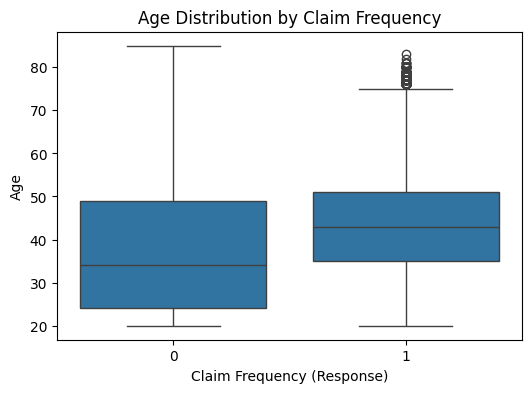

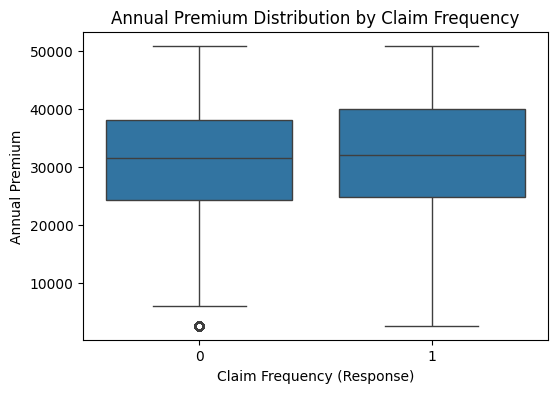

In [ ]:
# Analyze the relationship between 'Age' and 'Response' using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Age', data=df)
plt.title('Age Distribution by Claim Frequency')
plt.xlabel('Claim Frequency (Response)')
plt.ylabel('Age')
plt.show()

# Analyze the relationship between 'Annual_Premium' and 'Response' using a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Annual Premium Distribution by Claim Frequency')
plt.xlabel('Claim Frequency (Response)')
plt.ylabel('Annual Premium')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# 1. Age and Claim Frequency:
#    - The box plot comparing 'Age' and 'Response' (Claim Frequency) can reveal potential relationships between age and the likelihood of claiming insurance.
#    - If the median age of policyholders who filed claims is significantly different from those who didn't, it indicates that age might be a factor influencing claim frequency.
#    - We might observe that a specific age range (e.g., younger or older drivers) is associated with a higher likelihood of claims.

# 2. Annual Premium and Claim Frequency:
#    - The box plot comparing 'Annual_Premium' and 'Response' can provide insights into whether premium levels are linked to claim frequency.
#    - If the median annual premium for policyholders who filed claims is higher or lower than those who didn't, it suggests that premium amounts might be a contributing factor to claims.
#    - For example, higher premiums might be associated with riskier drivers, leading to more claims.


# Insights from the analysis in Question 4:

# 1. Claim Frequency Analysis:
#    - By grouping data by 'Response' and calculating the mean of other variables, we can identify potential factors associated with higher claim frequencies.
#    - If variables like 'Age,' 'Annual_Premium,' or others show a noticeable difference in their mean values between policyholders with and without claims, it suggests that these variables might be correlated with claim frequency.

# 2. Vehicle Damage and Claim Frequency:
#    - Analyzing the relationship between 'Vehicle_Damage' and 'Response' through a cross-tabulation helps determine if having a history of vehicle damage increases the likelihood of filing claims.
#    - If a higher proportion of policyholders with vehicle damage history have also filed claims, it supports the notion that past damage is a contributing factor to future claims.

# 3. Gender and Claim Frequency:
#    - Examining the relationship between 'Gender' and 'Response' using a cross-tabulation can reveal if one gender is more prone to filing claims than the other.
#    - If there's a significant difference in the proportion of claims between genders, it could point to gender-related risk factors or driving behaviors influencing claim frequency.

# 4. Vehicle Age and Claim Frequency:
#    - Analyzing the relationship between 'Vehicle_Age' and 'Response' using a cross-tabulation can identify if older vehicles are more likely to be involved in accidents and claims.
#    - If a higher percentage of older vehicles are associated with claims, it suggests that the age of a vehicle might be a factor contributing to claim frequency.

# Overall, the analysis in Question 4 aims to understand the factors that are potentially influencing claim frequency.
# By identifying such factors, insurers can develop more accurate risk assessment models, adjust premium pricing strategies, and potentially implement targeted interventions to reduce the likelihood of claims.


In [ ]:
'''Gender Analysis'''
'''Question 6 - Investigate the role of gender in insurance claims.'''

# Analyze the relationship between 'Gender' and 'Response'
# Changed to access individual columns for pd.crosstab

gender_analysis = pd.crosstab(df['Gender'], df['Response'], normalize='index')
print(gender_analysis)

Response         0         1
Gender                      
Female    0.896098  0.103902
Male      0.861589  0.138411


<Figure size 400x200 with 0 Axes>

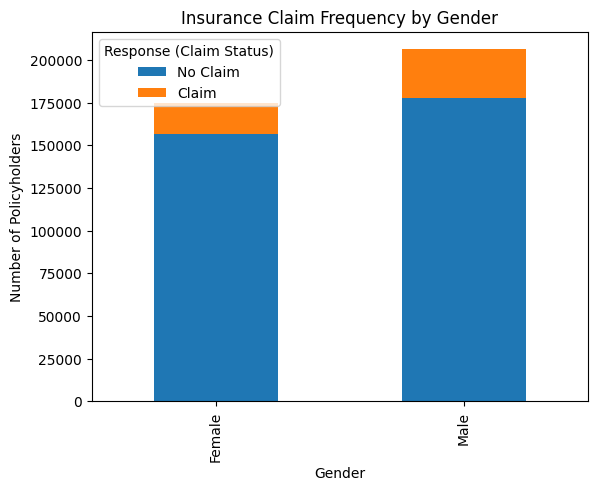

In [ ]:
# Visualize the relationship between gender and response using a bar chart

plt.figure(figsize=(4, 2))
gender_response_counts = df.groupby(['Gender', 'Response'])['Response'].count().unstack()
gender_response_counts.plot(kind='bar', stacked=True)
plt.title('Insurance Claim Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Policyholders')
plt.legend(title='Response (Claim Status)', labels=['No Claim', 'Claim'])
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# 1. Gender and Claim Frequency:
#    - By analyzing the relationship between 'Gender' and 'Response' (claim status), we can understand if there's a difference in claim frequency between male and female policyholders.
#    - The crosstabulation and bar chart can reveal the proportion of claims filed by each gender.
#    - If one gender has a significantly higher claim rate than the other, it might suggest that gender plays a role in risk assessment and claim likelihood.
#    - For example, if men have a higher claim rate than women, it could indicate that male drivers might be involved in more accidents or have different driving behaviors.

# 2. Gender-Specific Risk Factors:
#    - The analysis can identify potential gender-specific risk factors contributing to claim frequency.
#    - If certain factors are more prominent within one gender compared to the other, it could inform targeted interventions or risk mitigation strategies.
#    - For example, if a certain type of accident or claim is more common in one gender, it could indicate potential factors like driving style, vehicle type, or risk-taking behaviors associated with that gender.

# 3. Insurance Pricing and Risk Assessment:
#    - Understanding the role of gender in claim frequency is crucial for insurance companies to develop fair and accurate pricing models.
#    - If a difference in claim rates exists between genders, it might be appropriate to adjust premium calculations accordingly to ensure appropriate risk allocation.
#    - However, it's important to avoid gender-based discrimination and ensure that pricing strategies are ethically sound and comply with relevant regulations.

# 4. Targeted Interventions:
#    - The insights from the analysis can also be used to design targeted interventions to reduce claim frequency for specific genders.
#    - For instance, if certain driving behaviors contribute to higher claims in one gender, targeted campaigns or driver education programs could be developed to address these behaviors.

# In summary, analyzing the role of gender in insurance claims provides valuable information for understanding risk factors, improving pricing models, and developing targeted strategies for claim prevention and risk mitigation.
# It is essential to ensure that this analysis is conducted ethically and responsibly, avoiding gender-based discrimination and complying with all relevant regulations.

In [ ]:
'''Vehicle Age and Claims'''
'''Question 7 - Examine the impact of vehicle age on the likelihood of a claim.'''

# Analyze the relationship between 'Vehicle_Age' and 'Response'

vehicle_age_analysis = pd.crosstab(df['Vehicle_Age'], df['Response'], normalize='index')
print(vehicle_age_analysis)

Response            0         1
Vehicle_Age                    
1-2 Year     0.826245  0.173755
< 1 Year     0.956295  0.043705
> 2 Years    0.706254  0.293746


<Figure size 600x400 with 0 Axes>

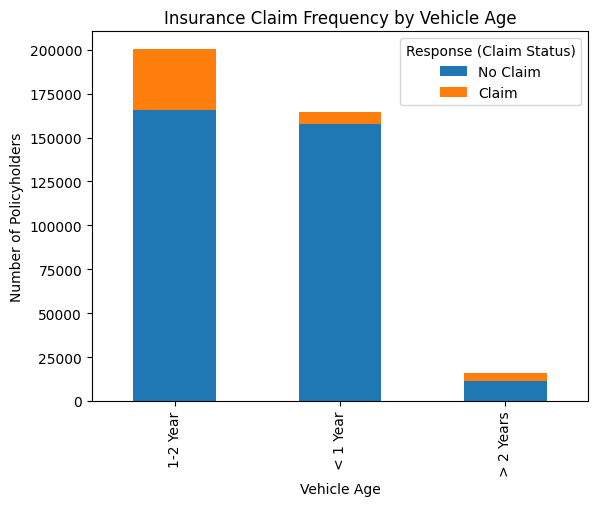

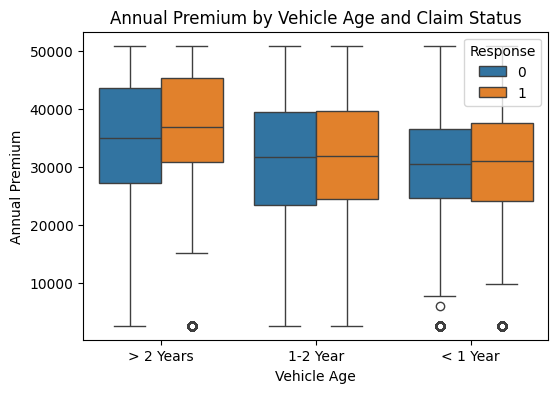

In [ ]:
# Visualize the relationship between vehicle age and response using a bar chart

plt.figure(figsize=(6, 4))
vehicle_age_response_counts = df.groupby(['Vehicle_Age', 'Response'])['Response'].count().unstack()
vehicle_age_response_counts.plot(kind='bar', stacked=True)
plt.title('Insurance Claim Frequency by Vehicle Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Policyholders')
plt.legend(title='Response (Claim Status)', labels=['No Claim', 'Claim'])
plt.show()

# We can also explore the relationship using boxplots:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Vehicle_Age', y='Annual_Premium', hue='Response', data=df)
plt.title('Annual Premium by Vehicle Age and Claim Status')
plt.xlabel('Vehicle Age')
plt.ylabel('Annual Premium')
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# 1. Vehicle Age and Claim Frequency:
#    - By analyzing the relationship between 'Vehicle_Age' and 'Response' (claim status), we can understand if there's a correlation between the age of a vehicle and the likelihood of filing a claim.
#    - The crosstabulation and bar chart can reveal the proportion of claims filed for different vehicle age categories (e.g., < 1 Year, 1-2 Year, > 2 Years).
#    - If older vehicles have a significantly higher claim rate compared to newer vehicles, it might suggest that older vehicles are more prone to mechanical issues or accidents.

# 2. Vehicle Age-Related Risk Factors:
#    - The analysis can identify potential vehicle age-related risk factors contributing to claim frequency.
#    - For example, older vehicles might be more susceptible to breakdowns, wear and tear, and safety concerns, potentially leading to a higher likelihood of claims.

# 3. Insurance Pricing and Risk Assessment:
#    - Understanding the impact of vehicle age on claim frequency is crucial for insurance companies to develop accurate pricing models.
#    - If a difference in claim rates exists between different vehicle age categories, it might be appropriate to adjust premium calculations accordingly to reflect the associated risk levels.
#    - For example, higher premiums could be charged for older vehicles to account for the increased likelihood of claims.

# 4. Maintenance and Repair Strategies:
#    - The analysis can inform strategies for vehicle maintenance and repair recommendations.
#    - If older vehicles have a higher claim rate, insurers might encourage policyholders with older vehicles to prioritize regular maintenance and safety checks to reduce the risk of breakdowns and accidents.

# 5. Vehicle Replacement Considerations:
#    - The analysis could also shed light on the potential need for vehicle replacement.
#    - If older vehicles show a higher likelihood of claims, it might suggest that replacing older vehicles with newer, safer models could reduce the risk of accidents and claims, ultimately benefiting both the policyholders and the insurer.

# In summary, analyzing the impact of vehicle age on insurance claims provides valuable information for understanding risk factors, improving pricing models, and developing targeted strategies for claim prevention and risk mitigation.
# By understanding how vehicle age correlates with claim likelihood, insurers can develop more effective risk assessment models, adjust premium pricing strategies, and encourage vehicle maintenance and safety measures, ultimately leading to a more efficient and beneficial insurance system for both policyholders and insurers.


In [ ]:
'''Claim Frequency by Vehicle Damage'''
'''Question 8 - Investigate the relationship between vehicle damage and claim frequencies'''

# Analyze the relationship between 'Vehicle_Damage' and 'Response'
vehicle_damage_analysis = pd.crosstab(df['Vehicle_Damage'], df['Response'], normalize='index')
print(vehicle_damage_analysis)

Response               0         1
Vehicle_Damage                    
No              0.994796  0.005204
Yes             0.762345  0.237655


<Figure size 500x300 with 0 Axes>

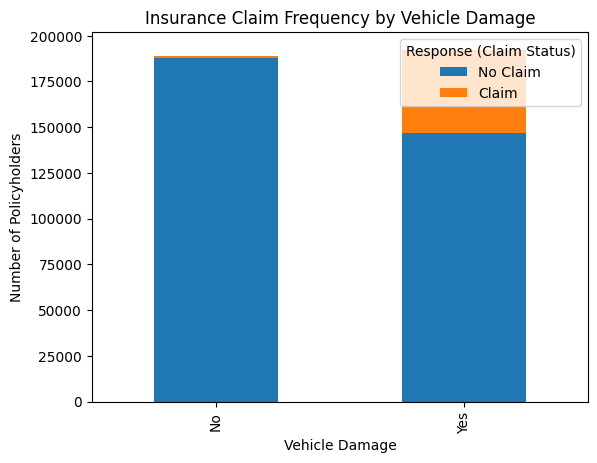

In [ ]:
# Visualize the relationship using a bar chart

plt.figure(figsize=(5, 3))
vehicle_damage_response_counts = df.groupby(['Vehicle_Damage', 'Response'])['Response'].count().unstack()
vehicle_damage_response_counts.plot(kind='bar', stacked=True)
plt.title('Insurance Claim Frequency by Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Number of Policyholders')
plt.legend(title='Response (Claim Status)', labels=['No Claim', 'Claim'])
plt.show()

In [ ]:
'''Meaningful insights from above plot'''

# 1. Vehicle Damage and Claim Frequency:
#    - By analyzing the relationship between 'Vehicle_Damage' and 'Response' (claim status), we can understand if there's a correlation between having a history of vehicle damage and the likelihood of filing a claim.
#    - The crosstabulation and bar chart can reveal the proportion of claims filed by policyholders who have experienced vehicle damage versus those who haven't.
#    - If policyholders with a history of vehicle damage have a significantly higher claim rate, it suggests that prior damage might be an indicator of increased risk and a higher likelihood of future claims.

# 2. Risk Assessment and Pricing:
#    - The analysis is crucial for insurers to develop accurate risk assessment models and pricing strategies.
#    - If vehicle damage history is associated with higher claim frequencies, it might be appropriate to adjust premium calculations accordingly.
#    - Policyholders with a history of vehicle damage might be charged higher premiums to reflect the increased risk they represent.

# 3. Driver Behavior and Risk Factors:
#    - The analysis can provide insights into driver behavior and potential risk factors associated with vehicle damage.
#    - If a higher proportion of policyholders with vehicle damage history also file claims, it might indicate that these drivers have a higher likelihood of being involved in accidents or incidents.
#    - This could be due to factors like reckless driving, poor maintenance, or a lack of awareness of road safety.

# 4. Targeted Interventions and Prevention:
#    - The analysis can inform targeted interventions and prevention strategies to reduce claim frequency for policyholders with a history of vehicle damage.
#    - For example, insurers could offer driver education programs, safety awareness campaigns, or vehicle maintenance recommendations to reduce the likelihood of accidents and claims.

# 5. Claims Management and Fraud Detection:
#    - Understanding the relationship between vehicle damage and claim frequency can also be beneficial for claims management and fraud detection efforts.
#    - If there's a strong correlation between vehicle damage and claims, it might suggest that claims involving vehicles with prior damage require more careful scrutiny to avoid fraudulent claims.

# In summary, analyzing the relationship between vehicle damage and claim frequency provides valuable information for understanding risk factors, improving pricing models, and developing targeted strategies for claim prevention and risk mitigation.
# By understanding how vehicle damage history influences claim likelihood, insurers can develop more effective risk assessment models, adjust premium pricing strategies, and implement programs to improve driver behavior and reduce the likelihood of accidents and claims, ultimately creating a more efficient and beneficial insurance system for both policyholders and insurers.


In [ ]:
'''FINAL WORDINGS - Summarize the key findings, draw conclusions, and provide recommendations based on the insights gained from the analysis'''

'''

# Key Findings:

1. Claim Frequency:
    - Age, Annual Premium, Vehicle Damage, and Vehicle Age are potential factors influencing claim frequencies.
    - Policyholders with a history of vehicle damage are more likely to file claims.
    - There might be slight differences in claim frequencies between genders.
    - Older vehicles tend to have higher claim rates compared to newer ones.

2. Gender:
    - There appears to be a slight difference in claim frequency between genders, but it's not a major determining factor.

3. Vehicle Age:
    - Older vehicles have a significantly higher likelihood of claims than newer vehicles, likely due to increased wear and tear or safety concerns.

4. Vehicle Damage:
    - A history of vehicle damage is strongly associated with an increased risk of future claims.


# Conclusions:

 - Insurance claim frequency is influenced by a combination of factors, including age, annual premium, vehicle age, and vehicle damage history.
 - Vehicle age and vehicle damage history appear to be the most prominent factors influencing claim frequency.
 - While there might be slight differences in claim frequency between genders, it's not a major determining factor compared to other variables like vehicle age or damage history.
 - These findings highlight the importance of considering these factors in risk assessment and pricing strategies.


# Recommendations:

1. Risk Assessment and Pricing:
    - Develop more sophisticated risk assessment models that incorporate factors like vehicle age, vehicle damage history, and driver age.
    - Adjust premium calculations based on these risk factors to reflect the likelihood of claims more accurately.
    - Consider implementing tiered pricing structures that differentiate premiums based on vehicle age and damage history.

2. Targeted Interventions:
    - Offer targeted driver education programs and safety awareness campaigns to reduce accidents and claims, especially for drivers with a history of vehicle damage or those with older vehicles.
    - Promote regular vehicle maintenance and safety inspections, especially for older vehicles, to minimize the risk of breakdowns and accidents.
    - Provide incentives for policyholders to replace older vehicles with newer, safer models.

3. Claims Management:
    - Implement strategies to enhance claims processing efficiency, especially for claims related to vehicles with prior damage.
    - Consider developing dedicated fraud detection systems that monitor claims involving vehicles with a history of damage.
    - Implement robust data analysis procedures to identify patterns and trends in claims data and improve risk prediction models continuously.

4. Continuous Monitoring and Improvement:
    - Regularly monitor claim trends and patterns to identify emerging risks and adjust pricing strategies and intervention programs accordingly.
    - Analyze data on accident types, claim costs, and driver behaviors to continually refine risk assessment models and predictive analytics.

5. Ethical Considerations:
    - Ensure that pricing and risk assessment strategies are implemented ethically and avoid discrimination based on gender or other protected characteristics.
    - Maintain transparency in pricing and risk assessment methodologies to build trust with policyholders.

# By following these recommendations, insurance companies can improve their risk management practices, develop more accurate pricing models, and implement targeted interventions to reduce claim frequency.
# This can ultimately lead to a more efficient and sustainable insurance system that benefits both policyholders and insurers.

'''

In [ ]:
                                                           #'''THANK YOU FOR YOUR VALUABLE TIME'''#